# Uploading Dataset

In [7]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download -d akash2907/bird-species-classification

bird-species-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
! unzip /content/bird-species-classification.zip

Archive:  /content/bird-species-classification.zip
replace test_data/test_data/blasti/DSC_6396.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Data Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [15]:
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [16]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

# CNN Training

In [19]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 97s 5s/step - loss: 6.2221 - accuracy: 0.0667 - val_loss: 2.9869 - val_accuracy: 0.0637
Epoch 2/10
19/19 [==============================] - 85s 5s/step - loss: 2.6342 - accuracy: 0.1333 - val_loss: 2.8117 - val_accuracy: 0.0701
Epoch 3/10
19/19 [==============================] - 86s 5s/step - loss: 2.4430 - accuracy: 0.2200 - val_loss: 2.8150 - val_accuracy: 0.0701
Epoch 4/10
19/19 [==============================] - 85s 5s/step - loss: 2.3769 - accuracy: 0.2467 - val_loss: 2.7908 - val_accuracy: 0.2229
Epoch 5/10
19/19 [==============================] - 85s 5s/step - loss: 2.2663 - accuracy: 0.2867 - val_loss: 2.7532 - val_accuracy: 0.1592
Epoch 6/10
19/19 [==============================] - 86s 5s/step - loss: 2.0998 - accuracy: 0.3200 - val_loss: 2.8547 - val_accuracy: 0.1401
Epoch 7/10
19/19 [==============================] - 85s 5s/step - loss: 2.0325 - accuracy: 0.3400 - val_loss: 2.8335 - val_accuracy: 0.1847
Epoch 8/10
19/19 [==

In [ ]:
model.save('birdWeights.h5')

# Testing

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/train_data/train_data/himgri/12029822653_1185544e7b_o.jpg',target_size=(120,120))

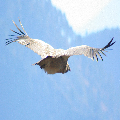

In [ ]:
img

In [ ]:
img = image.img_to_array(img)
img

array([[[138., 184., 234.],
        [135., 182., 234.],
        [142., 188., 238.],
        ...,
        [225., 245., 252.],
        [222., 240., 250.],
        [225., 243., 253.]],

       [[143., 186., 237.],
        [139., 182., 235.],
        [133., 183., 232.],
        ...,
        [226., 244., 254.],
        [230., 248., 255.],
        [227., 247., 255.]],

       [[142., 184., 234.],
        [135., 182., 236.],
        [143., 182., 237.],
        ...,
        [233., 247., 255.],
        [227., 245., 255.],
        [226., 246., 255.]],

       ...,

       [[132., 182., 231.],
        [134., 181., 235.],
        [136., 182., 234.],
        ...,
        [146., 186., 235.],
        [144., 186., 236.],
        [148., 186., 233.]],

       [[133., 180., 234.],
        [133., 179., 229.],
        [139., 182., 235.],
        ...,
        [144., 188., 237.],
        [143., 189., 241.],
        [147., 187., 236.]],

       [[134., 181., 235.],
        [134., 181., 235.],
        [135., 1

In [ ]:
img = np.expand_dims(img,axis=0)
img

array([[[[138., 184., 234.],
         [135., 182., 234.],
         [142., 188., 238.],
         ...,
         [225., 245., 252.],
         [222., 240., 250.],
         [225., 243., 253.]],

        [[143., 186., 237.],
         [139., 182., 235.],
         [133., 183., 232.],
         ...,
         [226., 244., 254.],
         [230., 248., 255.],
         [227., 247., 255.]],

        [[142., 184., 234.],
         [135., 182., 236.],
         [143., 182., 237.],
         ...,
         [233., 247., 255.],
         [227., 245., 255.],
         [226., 246., 255.]],

        ...,

        [[132., 182., 231.],
         [134., 181., 235.],
         [136., 182., 234.],
         ...,
         [146., 186., 235.],
         [144., 186., 236.],
         [148., 186., 233.]],

        [[133., 180., 234.],
         [133., 179., 229.],
         [139., 182., 235.],
         ...,
         [144., 188., 237.],
         [143., 189., 241.],
         [147., 187., 236.]],

        [[134., 181., 235.],
       

In [ ]:
model.predict(img)

1/1 [==============================] - 0s 18ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
pred = np.argmax(model.predict(img))

1/1 [==============================] - 0s 25ms/step


In [28]:
import os
output = os.listdir('/content/train_data/train_data')
output

['hsparo',
 'himbul',
 'indvul',
 'gretit',
 'himgri',
 'wcrsrt',
 'mgprob',
 'hilpig',
 'jglowl',
 'rebimg',
 'cmnmyn',
 'lbicrw',
 'blasti',
 'brhkyt',
 'cbrtsh',
 'bonegl']

In [ ]:
output[pred]

'jglowl'

# model tuning

In [17]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [20]:
# Initializing the seq model
model = Sequential()
# Adding conv layer with input
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
# Normalizing the conv layer output
model.add(BatchNormalization())
# Selecting the max values
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropping the unwanted 20% of data
model.add(Dropout(0.2))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
# Hiddern layers
model.add(Dense(62,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
# Output layer
model.add(Dense(16,activation='softmax'))

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='accuracy',patience=8)

In [24]:
model.fit(train,batch_size=8,validation_data=test,epochs=50,callbacks=early_stop)

Epoch 1/50
19/19 [==============================] - 100s 5s/step - loss: 2.8880 - accuracy: 0.1267 - val_loss: 2.7864 - val_accuracy: 0.0955
Epoch 2/50
19/19 [==============================] - 85s 5s/step - loss: 2.3296 - accuracy: 0.3000 - val_loss: 3.1306 - val_accuracy: 0.0955
Epoch 3/50
19/19 [==============================] - 87s 5s/step - loss: 2.1225 - accuracy: 0.3467 - val_loss: 3.5168 - val_accuracy: 0.0955
Epoch 4/50
19/19 [==============================] - 87s 5s/step - loss: 1.9575 - accuracy: 0.4133 - val_loss: 3.6682 - val_accuracy: 0.1019
Epoch 5/50
19/19 [==============================] - 85s 5s/step - loss: 1.8359 - accuracy: 0.4400 - val_loss: 4.3171 - val_accuracy: 0.0955
Epoch 6/50
19/19 [==============================] - 118s 6s/step - loss: 1.6932 - accuracy: 0.5133 - val_loss: 4.6442 - val_accuracy: 0.0573
Epoch 7/50
19/19 [==============================] - 85s 5s/step - loss: 1.5261 - accuracy: 0.5667 - val_loss: 4.4964 - val_accuracy: 0.0573
Epoch 8/50
19/19 [

In [27]:
img1 = image.load_img('/content/train_data/train_data/himgri/12029822653_1185544e7b_o.jpg',target_size=(120,120))

In [32]:
img1

array([[[[138., 184., 234.],
         [135., 182., 234.],
         [142., 188., 238.],
         ...,
         [225., 245., 252.],
         [222., 240., 250.],
         [225., 243., 253.]],

        [[143., 186., 237.],
         [139., 182., 235.],
         [133., 183., 232.],
         ...,
         [226., 244., 254.],
         [230., 248., 255.],
         [227., 247., 255.]],

        [[142., 184., 234.],
         [135., 182., 236.],
         [143., 182., 237.],
         ...,
         [233., 247., 255.],
         [227., 245., 255.],
         [226., 246., 255.]],

        ...,

        [[132., 182., 231.],
         [134., 181., 235.],
         [136., 182., 234.],
         ...,
         [146., 186., 235.],
         [144., 186., 236.],
         [148., 186., 233.]],

        [[133., 180., 234.],
         [133., 179., 229.],
         [139., 182., 235.],
         ...,
         [144., 188., 237.],
         [143., 189., 241.],
         [147., 187., 236.]],

        [[134., 181., 235.],
       

In [33]:
model.predict(img1)
pred = np.argmax(model.predict(img1))
output[pred]

1/1 [==============================] - 0s 22ms/step


'himgri'